<a href="https://colab.research.google.com/github/afrazeh/6220/blob/main/6220-Afrazeh-Project_Classification_with_PyCaret%20Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [3]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**


https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset

In [9]:
#read cvs file into dataframe
df = pd.read_csv('/content/smoke detection - simple3 ds.csv')
df.head(25)

Temperature[C]  Humidity[%]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0           20.000        57.36        400   12306        18520   
1           20.015        56.67        400   12345        18651   
2           20.029        55.96        400   12374        18764   
3           20.044        55.28        400   12390        18849   
4           20.059        54.69        400   12403        18921   
5           20.073        54.12        400   12419        18998   
6           20.088        53.61        400   12432        19058   
7           20.103        53.20        400   12439        19114   
8           20.117        52.81        400   12448        19155   
9           20.132        52.46        400   12453        19195   
10          20.146        52.15        400   12454        19230   
11          20.161        51.84        400   12467        19264   
12          20.175        51.62        400   12467        19299   
13          20.190        51.39        400   12469        19317   
14          20.204        51.17        403   12468        19338   
15          20.219        50.99        400   12475        19362   
16          20.233        50.86        400   12480        19382   
17          20.248        50.66        400   12477        19400   
18          20.262        50.49        400   12481        19422   
19          20.277        50.27        406   12489        19451   
20          20.291        50.15        400   12491        19456   
21          20.305        50.02        400   12487        19470   
22          20.320        49.96        400   12492        19489   
23          20.334        49.83        415   12495        19489   
24          20.348        49.76        400   12498        19503   

    Pressure[hPa]  class  
0         939.735      0  
1         939.744      0  
2         939.738      0  
3         939.736      0  
4         939.744      0  
5         939.725      0  
6         939.738      0  
7         939.758      0  
8         939.758      0  
9         939.756      0  
10        939.757      0  
11        939.754      0  
12        939.755      0  
13        939.758      0  
14        939.742      0  
15        939.741      0  
16        939.758      0  
17        939.764      0  
18        939.761      0  
19        939.752      0  
20        939.729      0  
21        939.741      0  
22        939.756      0  
23        939.764      0  
24        939.770      0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  150 non-null    float64
 1   Humidity[%]     150 non-null    float64
 2   eCO2[ppm]       150 non-null    int64  
 3   Raw H2          150 non-null    int64  
 4   Raw Ethanol     150 non-null    int64  
 5   Pressure[hPa]   150 non-null    float64
 6   class           150 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.3 KB


In [11]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [12]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

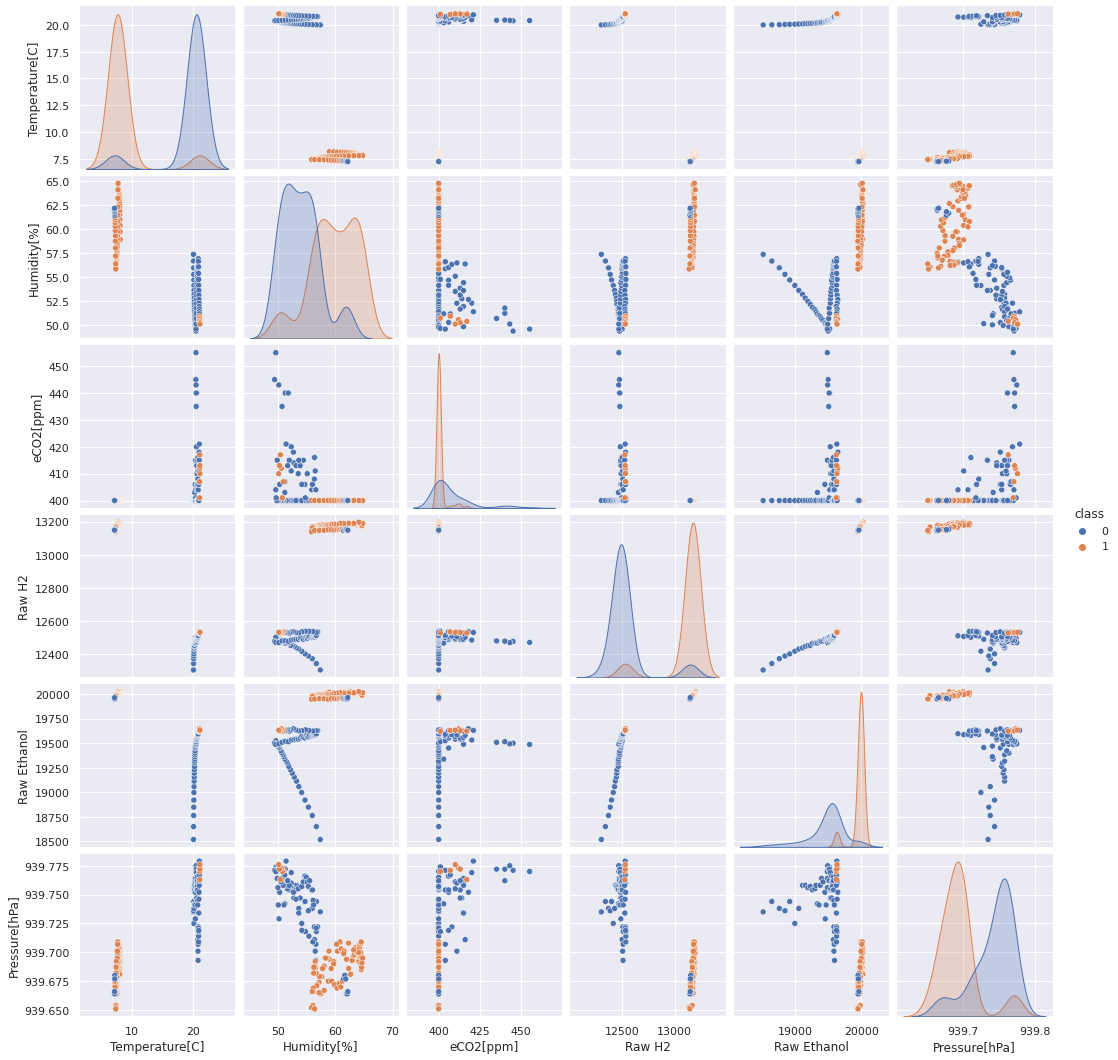

In [13]:
sns.pairplot(df, hue='class')
plt.show()

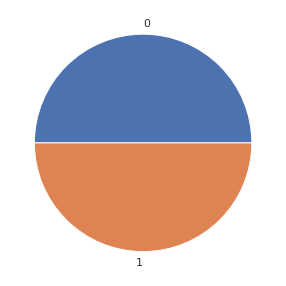

In [14]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [15]:
X = df.drop(columns=['class'])
X.head(10)

Temperature[C]  Humidity[%]  eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]
0          20.000        57.36        400   12306        18520        939.735
1          20.015        56.67        400   12345        18651        939.744
2          20.029        55.96        400   12374        18764        939.738
3          20.044        55.28        400   12390        18849        939.736
4          20.059        54.69        400   12403        18921        939.744
5          20.073        54.12        400   12419        18998        939.725
6          20.088        53.61        400   12432        19058        939.738
7          20.103        53.20        400   12439        19114        939.758
8          20.117        52.81        400   12448        19155        939.758
9          20.132        52.46        400   12453        19195        939.756

In [16]:
X.describe().transpose()

count          mean         std        min         25%  \
Temperature[C]  150.0     14.111533    6.445560      7.233      7.6970   
Humidity[%]     150.0     56.799533    4.662120     49.370     52.7575   
eCO2[ppm]       150.0    404.053333    9.486682    400.000    400.0000   
Raw H2          150.0  12831.106667  343.594172  12306.000  12498.0000   
Raw Ethanol     150.0  19723.813333  318.111508  18520.000  19552.2500   
Pressure[hPa]   150.0    939.717880    0.036596    939.651    939.6880   

                      50%          75%        max  
Temperature[C]     14.078     20.52950     21.043  
Humidity[%]        56.415     60.91000     64.770  
eCO2[ppm]         400.000    402.50000    455.000  
Raw H2          12838.500  13176.75000  13196.000  
Raw Ethanol     19797.500  19994.25000  20025.000  
Pressure[hPa]     939.708    939.75575    939.779

**Standardize the Data**

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature[C]  Humidity[%]  eCO2[ppm]    Raw H2  Raw Ethanol  \
0        0.916630     0.120620  -0.428697 -1.533396    -3.796927   
1        0.918965    -0.027877  -0.428697 -1.419509    -3.383742   
2        0.921144    -0.180679  -0.428697 -1.334825    -3.027331   
3        0.923479    -0.327024  -0.428697 -1.288102    -2.759234   
4        0.925814    -0.454000  -0.428697 -1.250140    -2.532140   
5        0.927994    -0.576671  -0.428697 -1.203418    -2.289275   
6        0.930329    -0.686430  -0.428697 -1.165455    -2.100031   
7        0.932663    -0.774667  -0.428697 -1.145014    -1.923402   
8        0.934843    -0.858600  -0.428697 -1.118733    -1.794084   
9        0.937178    -0.933925  -0.428697 -1.104132    -1.667921   

   Pressure[hPa]  
0       0.469377  
1       0.716128  
2       0.551627  
3       0.496794  
4       0.716128  
5       0.195208  
6       0.551627  
7       1.099965  
8       1.099965  
9       1.045131

In [18]:
X.describe().transpose()

count          mean      std       min       25%       50%  \
Temperature[C]  150.0 -9.473903e-17  1.00335 -1.070749 -0.998520 -0.005220   
Humidity[%]     150.0 -6.631732e-16  1.00335 -1.598934 -0.869899 -0.082757   
eCO2[ppm]       150.0 -8.289665e-16  1.00335 -0.428697 -0.428697 -0.428697   
Raw H2          150.0  2.842171e-16  1.00335 -1.533396 -0.972725  0.021590   
Raw Ethanol     150.0  5.210647e-15  1.00335 -3.796927 -0.541125  0.232414   
Pressure[hPa]   150.0  5.194920e-12  1.00335 -1.833640 -0.819216 -0.270879   

                     75%       max  
Temperature[C]  0.999055  1.078989  
Humidity[%]     0.884627  1.715350  
eCO2[ppm]      -0.164287  5.388327  
Raw H2          1.009334  1.065547  
Raw Ethanol     0.852980  0.949968  
Pressure[hPa]   1.038277  1.675719

**Observations and variables**

In [19]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

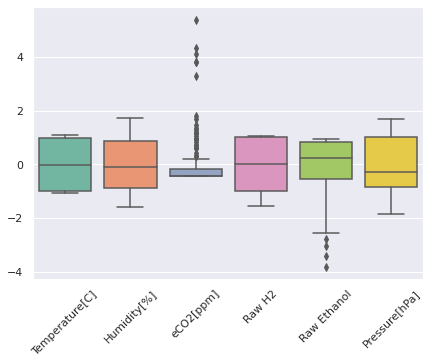

In [20]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

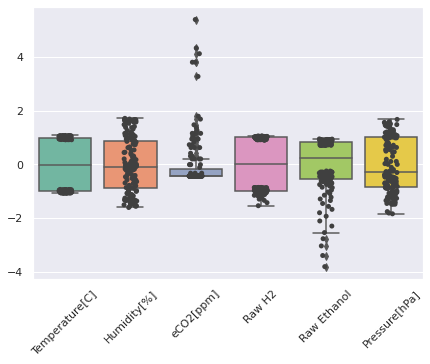

In [21]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

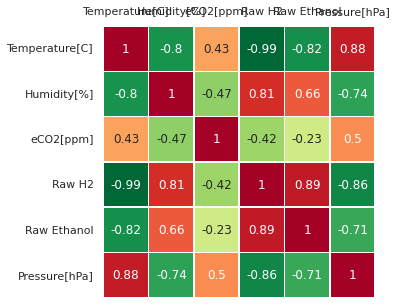

In [22]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

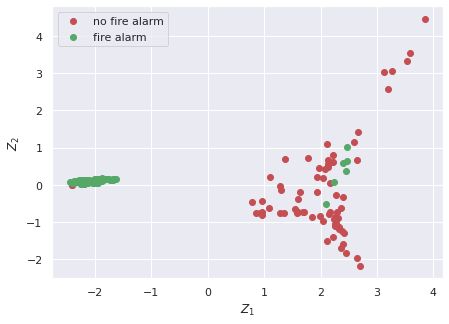

In [23]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(no fire alarm)->0,  2(fire alarm)->1
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='no fire alarm')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='fire alarm')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

[[ 0.45646579 -0.11124156  0.06502673 -0.16578402  0.6031545  -0.61948053]
 [-0.41011311 -0.06220938  0.87692849 -0.15093167  0.18849614  0.02494964]
 [ 0.25351151  0.89786267  0.22815345  0.27784701  0.01083344 -0.01429036]
 [-0.46019333  0.15823092 -0.10030463 -0.03257994 -0.40712238 -0.76571142]
 [-0.40312259  0.38587506 -0.35921467 -0.59209117  0.42505523  0.16826624]
 [ 0.42999118  0.06050899  0.18872666 -0.72173605 -0.50411893  0.02810116]]


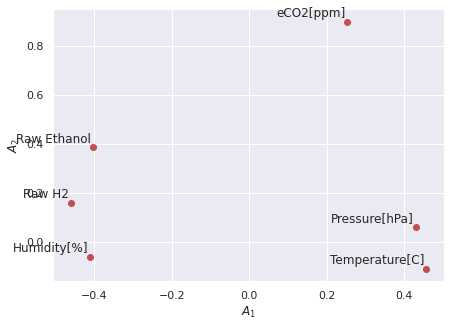

In [24]:
A = pca.components_.T 
print (A)

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


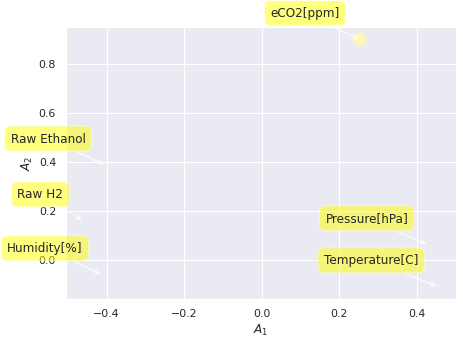

In [25]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[4.54860131e+00 8.44133735e-01 2.97855070e-01 2.37815309e-01
 1.10690127e-01 1.17290847e-03]


Text(0, 0.5, 'Explained variance')

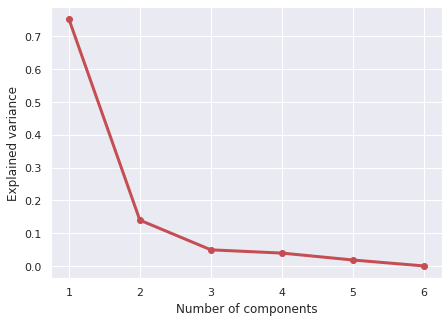

In [26]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print (Lambda)

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

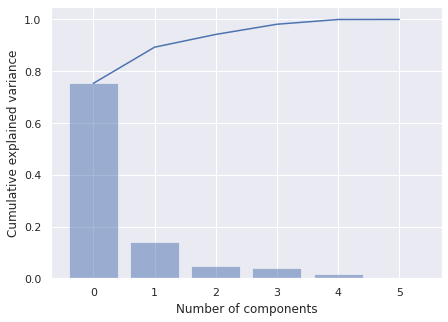

In [27]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

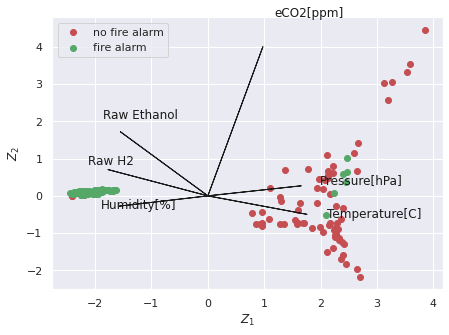

In [28]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='no fire alarm')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='fire alarm')

plt.legend(loc='upper left')

##**Using PCA Library**

In [29]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=3cc6b1de605ff08ba449f8ca55e57fe2fba2a5399b45627e62e4f015ce5bb708
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b08dc3c7cd9143ff0307bba9bf0e1587cf333e33a0246b9b65d4e364a4ed6adc
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [30]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [31]:
out['PC']

PC1       PC2       PC3       PC4
0    2.698376 -2.173751  1.673874  1.670039
1    2.647470 -1.972384  1.430528  1.265621
2    2.457748 -1.822144  1.129106  1.193262
3    2.365676 -1.705773  0.889584  1.094278
4    2.404112 -1.591225  0.734398  0.819057
..        ...       ...       ...       ...
145 -2.188730  0.029575  0.201928  0.196086
146 -2.244473  0.030411  0.207237  0.238030
147 -2.413627  0.008102  0.165686  0.490842
148 -2.410755 -0.004218  0.202712  0.498176
149 -2.414307  0.014983  0.212722  0.431844

[150 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [150] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [150] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f41acab6c10>)

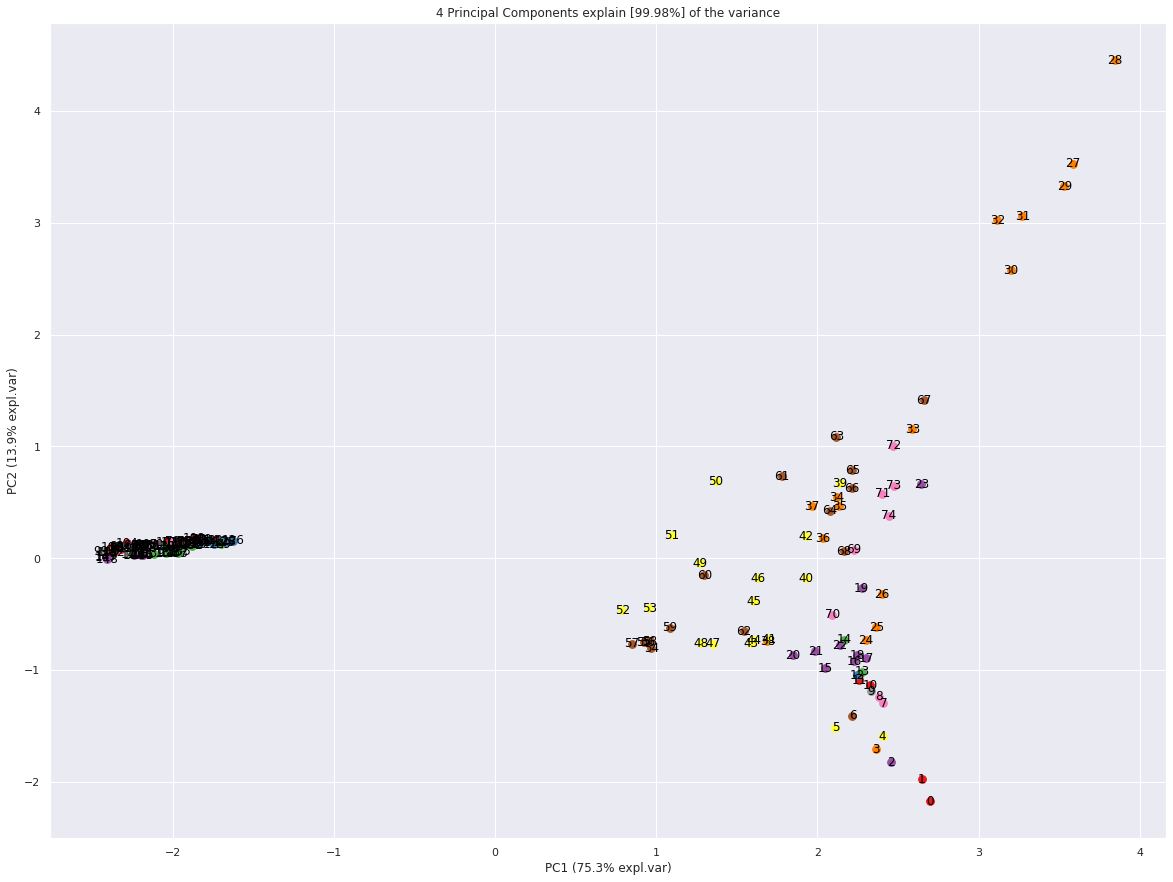

In [32]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [33]:
A = out['loadings'].T

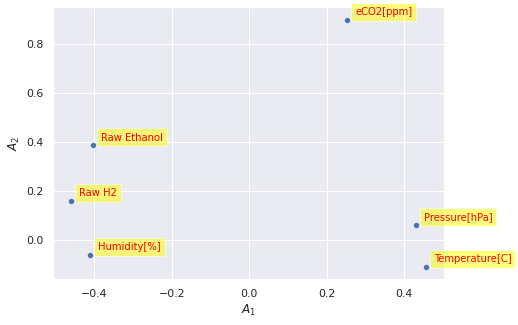

In [34]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

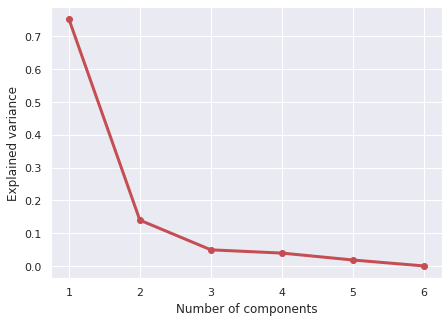

In [35]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

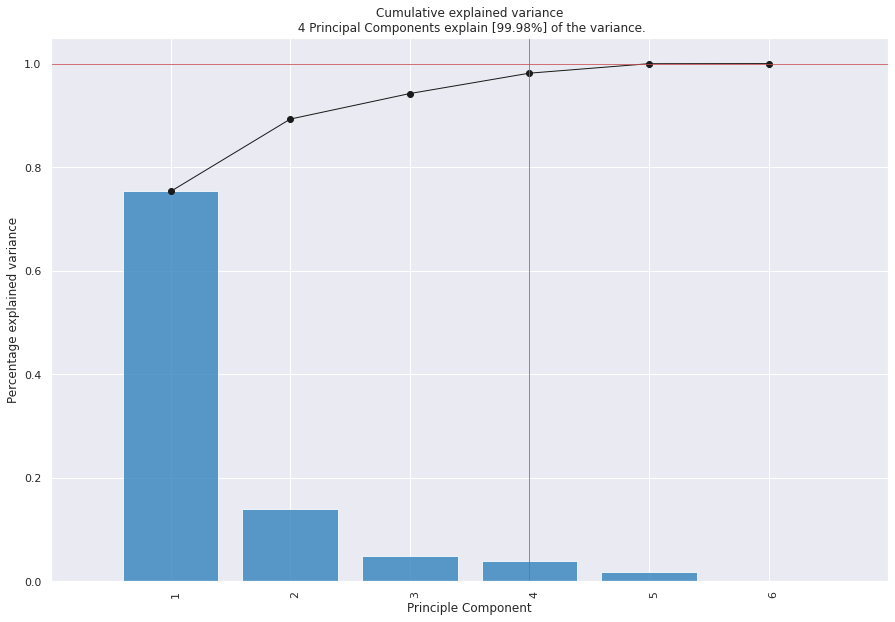

<Figure size 504x360 with 0 Axes>

In [36]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [150] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [150] unique colors! Available unique colors: [9].


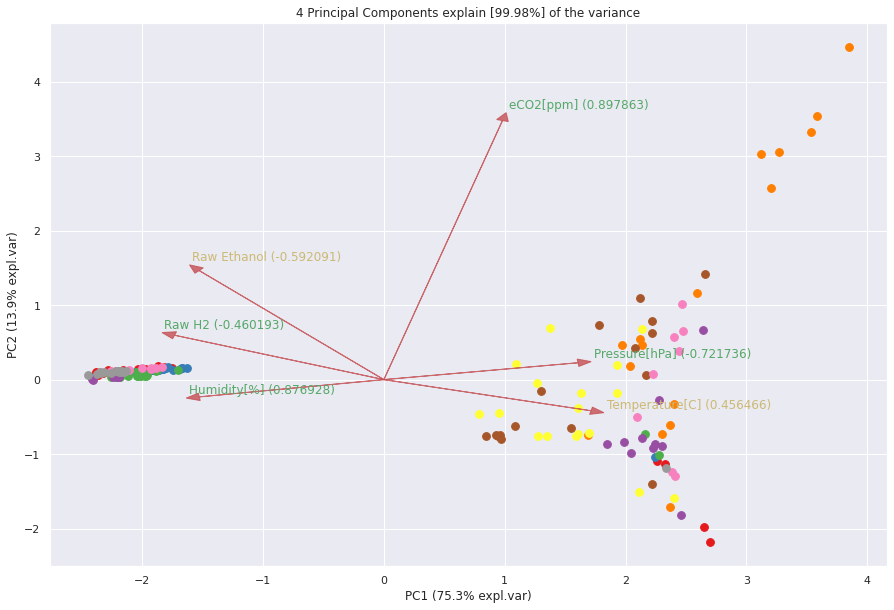

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f41b1bbce80>)

In [37]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [150] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [150] unique colors! Available unique colors: [9].


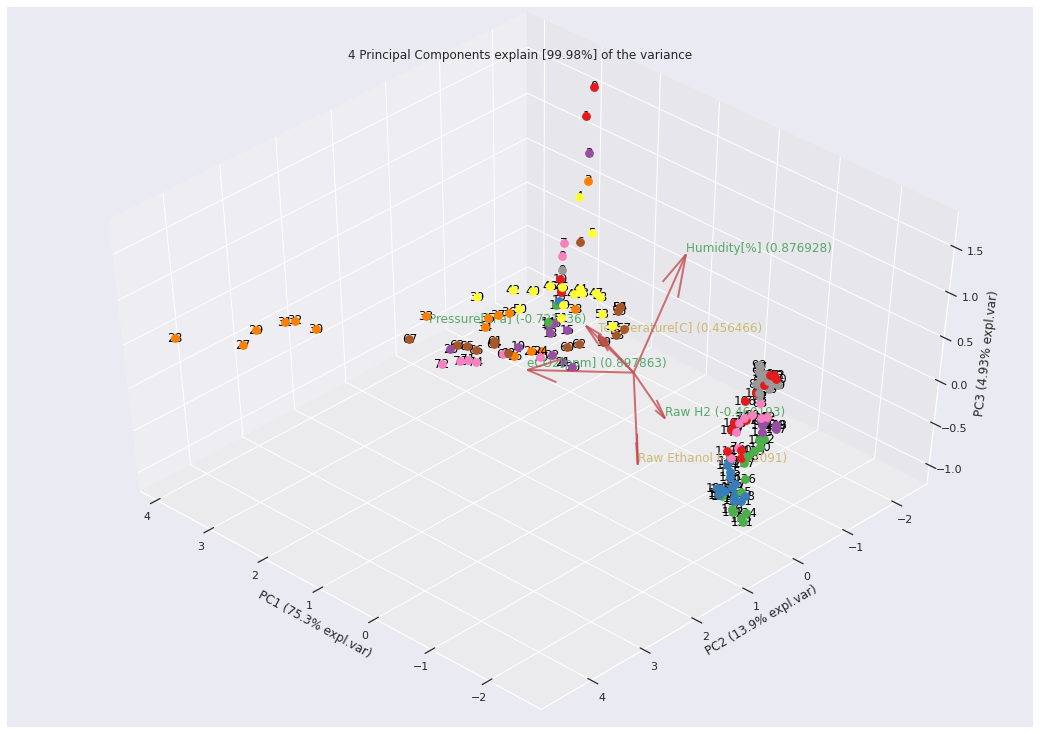

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f41b1db3cd0>)

In [38]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

In [40]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [41]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (135, 7)
Unseen Data For Predictions: (15, 7)


In [42]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (135, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (94, 21)
12                    Transformed Test Set          (41, 21)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              3601
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [43]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.9778  0.9800   0.980  0.9800   
rf               Random Forest Classifier    0.9778  1.0000   1.000  0.9600   
ada                  Ada Boost Classifier    0.9778  0.9900   0.980  0.9800   
gbc          Gradient Boosting Classifier    0.9778  0.9800   0.980  0.9800   
et                 Extra Trees Classifier    0.9778  1.0000   1.000  0.9600   
lightgbm  Light Gradient Boosting Machine    0.9556  0.9975   0.975  0.9400   
lr                    Logistic Regression    0.9344  1.0000   0.955  0.9267   
knn                K Neighbors Classifier    0.8911  0.9930   0.885  0.9100   
ridge                    Ridge Classifier    0.8911  0.0000   0.865  0.9267   
lda          Linear Discriminant Analysis    0.8911  0.9950   0.865  0.9267   
nb                            Naive Bayes    0.7789  0.8960   0.930  0.7363   
dummy                    Dummy Classifier    0.5222  0.5000   0.000  0.0000   
svm                   SVM - Linear Kernel    0.4889  0.0000   0.700  0.3333   
qda       Quadratic Discriminant Analysis    0.4889  0.0000   0.500  0.2333   

              F1   Kappa     MCC  TT (Sec)  
dt        0.9778  0.9561  0.9600     0.011  
rf        0.9778  0.9561  0.9600     0.166  
ada       0.9778  0.9561  0.9600     0.097  
gbc       0.9778  0.9561  0.9600     0.050  
et        0.9778  0.9561  0.9600     0.174  
lightgbm  0.9524  0.9111  0.9191     0.102  
lr        0.9324  0.8702  0.8840     0.313  
knn       0.8788  0.7808  0.8054     0.014  
ridge     0.8768  0.7808  0.8054     0.010  
lda       0.8768  0.7808  0.8054     0.012  
nb        0.8006  0.5610  0.6159     0.010  
dummy     0.0000  0.0000  0.0000     0.010  
svm       0.4509  0.0000  0.0000     0.012  
qda       0.3179  0.0000  0.0000     0.011

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [45]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Create Decision Tree Classifier**

In [46]:
dt = create_model('dt')

Accuracy   AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
1       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
2       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
3       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
4       0.8889  0.90    0.80   1.00  0.8889  0.7805  0.80
5       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
6       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
7       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
8       0.8889  0.90    1.00   0.80  0.8889  0.7805  0.80
9       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
Mean    0.9778  0.98    0.98   0.98  0.9778  0.9561  0.96
SD      0.0444  0.04    0.06   0.06  0.0444  0.0878  0.08

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [47]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune Decision Tree Model**

In [48]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9000  1.0000  0.8000  1.0000  0.8889  0.8000  0.8165
4       0.8889  1.0000  0.8000  1.0000  0.8889  0.7805  0.8000
5       0.8889  1.0000  0.7500  1.0000  0.8571  0.7692  0.7906
6       0.8889  0.9500  1.0000  0.8000  0.8889  0.7805  0.8000
7       0.7778  0.8500  1.0000  0.6667  0.8000  0.5714  0.6325
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9344  0.9800  0.9350  0.9467  0.9324  0.8702  0.8840
SD      0.0731  0.0458  0.1001  0.1108  0.0719  0.1431  0.1257

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [49]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [50]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [51]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Gradient Boosting Classifier (GBC)

In [52]:
gbc = create_model('gbc')

Accuracy   AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
1       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
2       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
3       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
4       0.8889  0.90    0.80   1.00  0.8889  0.7805  0.80
5       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
6       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
7       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
8       0.8889  0.90    1.00   0.80  0.8889  0.7805  0.80
9       1.0000  1.00    1.00   1.00  1.0000  1.0000  1.00
Mean    0.9778  0.98    0.98   0.98  0.9778  0.9561  0.96
SD      0.0444  0.04    0.06   0.06  0.0444  0.0878  0.08

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [53]:
tuned_gbc = tune_model(gbc)

Accuracy  AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
1       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
2       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
3       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
4       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
5       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
6       0.8889  1.0     1.0   0.80  0.8889  0.7805  0.80
7       0.8889  1.0     1.0   0.80  0.8889  0.7805  0.80
8       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
9       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
Mean    0.9778  1.0     1.0   0.96  0.9778  0.9561  0.96
SD      0.0444  0.0     0.0   0.08  0.0444  0.0878  0.08

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [55]:
evaluate_model(tuned_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Extra Trees Classifier (ET)

In [56]:
et = create_model('et')

Accuracy  AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
1       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
2       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
3       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
4       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
5       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
6       0.8889  1.0     1.0   0.80  0.8889  0.7805  0.80
7       0.8889  1.0     1.0   0.80  0.8889  0.7805  0.80
8       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
9       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
Mean    0.9778  1.0     1.0   0.96  0.9778  0.9561  0.96
SD      0.0444  0.0     0.0   0.08  0.0444  0.0878  0.08

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [57]:
tuned_et = tune_model(et)

Accuracy  AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
1       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
2       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
3       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
4       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
5       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
6       0.8889  1.0     1.0   0.80  0.8889  0.7805  0.80
7       0.8889  1.0     1.0   0.80  0.8889  0.7805  0.80
8       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
9       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
Mean    0.9778  1.0     1.0   0.96  0.9778  0.9561  0.96
SD      0.0444  0.0     0.0   0.08  0.0444  0.0878  0.08

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [58]:
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [59]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9000  1.0000  0.8000  1.0000  0.8889  0.8000  0.8165
4       0.8889  1.0000  0.8000  1.0000  0.8889  0.7805  0.8000
5       0.8889  1.0000  0.7500  1.0000  0.8571  0.7692  0.7906
6       0.8889  0.9500  1.0000  0.8000  0.8889  0.7805  0.8000
7       0.7778  0.8500  1.0000  0.6667  0.8000  0.5714  0.6325
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9344  0.9800  0.9350  0.9467  0.9324  0.8702  0.8840
SD      0.0731  0.0458  0.1001  0.1108  0.0719  0.1431  0.1257

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [60]:
tuned_best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate the Best Model**


In [61]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [62]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (135, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (94, 3)
12                    Transformed Test Set           (41, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              2551
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [63]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy    AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.9778  0.980   1.000  0.9600   
gbc          Gradient Boosting Classifier    0.9778  0.990   1.000  0.9600   
et                 Extra Trees Classifier    0.9778  1.000   1.000  0.9600   
svm                   SVM - Linear Kernel    0.9667  0.000   0.975  0.9667   
lightgbm  Light Gradient Boosting Machine    0.9667  1.000   0.980  0.9600   
ada                  Ada Boost Classifier    0.9578  0.990   0.960  0.9600   
knn                K Neighbors Classifier    0.9567  1.000   1.000  0.9300   
rf               Random Forest Classifier    0.9478  1.000   0.940  0.9600   
lr                    Logistic Regression    0.9133  1.000   0.865  0.9600   
nb                            Naive Bayes    0.9133  0.894   0.865  0.9600   
ridge                    Ridge Classifier    0.9133  0.000   0.865  0.9600   
qda       Quadratic Discriminant Analysis    0.9133  0.995   0.865  0.9600   
lda          Linear Discriminant Analysis    0.9133  0.969   0.865  0.9600   
dummy                    Dummy Classifier    0.5222  0.500   0.000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
dt        0.9778  0.9561  0.9600     0.009  
gbc       0.9778  0.9561  0.9600     0.071  
et        0.9778  0.9561  0.9600     0.146  
svm       0.9657  0.9341  0.9423     0.009  
lightgbm  0.9667  0.9341  0.9400     0.018  
ada       0.9528  0.9161  0.9255     0.074  
knn       0.9598  0.9152  0.9249     0.017  
rf        0.9349  0.8961  0.9100     0.172  
lr        0.8968  0.8237  0.8421     0.013  
nb        0.8968  0.8237  0.8421     0.011  
ridge     0.8968  0.8237  0.8421     0.010  
qda       0.8968  0.8237  0.8421     0.011  
lda       0.8968  0.8237  0.8421     0.011  
dummy     0.0000  0.0000  0.0000     0.011

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [68]:
# 1 (DT)
best_model_pca

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune the Best Model (DT)**

In [70]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy   AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
1       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
2       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
3       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
4       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
5       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
6       0.8889  1.00     1.0   0.80  0.8889  0.7805  0.80
7       0.8889  0.90     1.0   0.80  0.8889  0.7805  0.80
8       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
9       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
Mean    0.9778  0.99     1.0   0.96  0.9778  0.9561  0.96
SD      0.0444  0.03     0.0   0.08  0.0444  0.0878  0.08

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [71]:
tuned_best_model_pca

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [72]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [73]:
# 2 (GBC)
gbc_pca=create_model('gbc')

Accuracy   AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
1       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
2       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
3       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
4       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
5       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
6       0.8889  1.00     1.0   0.80  0.8889  0.7805  0.80
7       0.8889  0.90     1.0   0.80  0.8889  0.7805  0.80
8       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
9       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
Mean    0.9778  0.99     1.0   0.96  0.9778  0.9561  0.96
SD      0.0444  0.03     0.0   0.08  0.0444  0.0878  0.08

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [74]:
tuned_gbc_pca=tune_model(gbc_pca)

Accuracy    AUC  Recall  Prec.      F1   Kappa     MCC
0       0.9000  1.000    0.80   1.00  0.8889  0.8000  0.8165
1       1.0000  1.000    1.00   1.00  1.0000  1.0000  1.0000
2       1.0000  1.000    1.00   1.00  1.0000  1.0000  1.0000
3       1.0000  1.000    1.00   1.00  1.0000  1.0000  1.0000
4       1.0000  1.000    1.00   1.00  1.0000  1.0000  1.0000
5       1.0000  1.000    1.00   1.00  1.0000  1.0000  1.0000
6       0.8889  1.000    1.00   0.80  0.8889  0.7805  0.8000
7       0.8889  0.850    1.00   0.80  0.8889  0.7805  0.8000
8       1.0000  1.000    1.00   1.00  1.0000  1.0000  1.0000
9       1.0000  1.000    1.00   1.00  1.0000  1.0000  1.0000
Mean    0.9678  0.985    0.98   0.96  0.9667  0.9361  0.9416
SD      0.0493  0.045    0.06   0.08  0.0509  0.0977  0.0892

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [75]:
evaluate_gbc_pca=evaluate_model(gbc_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [76]:
# 3 (ET)
et_pca=create_model('et')

Accuracy  AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
1       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
2       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
3       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
4       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
5       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
6       0.8889  1.0     1.0   0.80  0.8889  0.7805  0.80
7       0.8889  1.0     1.0   0.80  0.8889  0.7805  0.80
8       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
9       1.0000  1.0     1.0   1.00  1.0000  1.0000  1.00
Mean    0.9778  1.0     1.0   0.96  0.9778  0.9561  0.96
SD      0.0444  0.0     0.0   0.08  0.0444  0.0878  0.08

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [77]:
tuned_et_pca=tune_model(et_pca)

Accuracy  AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0  1.0000   1.00  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000   1.00  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000   1.00  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000   1.00  1.0000  1.0000  1.0000
4       0.8889  1.0  0.8000   1.00  0.8889  0.7805  0.8000
5       0.8889  1.0  0.7500   1.00  0.8571  0.7692  0.7906
6       0.8889  1.0  1.0000   0.80  0.8889  0.7805  0.8000
7       0.8889  1.0  1.0000   0.80  0.8889  0.7805  0.8000
8       1.0000  1.0  1.0000   1.00  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000   1.00  1.0000  1.0000  1.0000
Mean    0.9556  1.0  0.9550   0.96  0.9524  0.9111  0.9191
SD      0.0544  0.0  0.0907   0.08  0.0590  0.1090  0.0992

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [78]:
evaluate_et_pca=evaluate_model(et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Explainable AI with Shapley values**


In [79]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [81]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 14.3 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [82]:
import shap

In [83]:
dt_pca = create_model('dt')

Accuracy   AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
1       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
2       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
3       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
4       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
5       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
6       0.8889  0.90     1.0   0.80  0.8889  0.7805  0.80
7       0.8889  0.90     1.0   0.80  0.8889  0.7805  0.80
8       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
9       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
Mean    0.9778  0.98     1.0   0.96  0.9778  0.9561  0.96
SD      0.0444  0.04     0.0   0.08  0.0444  0.0878  0.08

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [84]:
tuned_dt_pca = tune_model(dt_pca)

Accuracy   AUC  Recall  Prec.      F1   Kappa   MCC
0       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
1       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
2       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
3       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
4       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
5       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
6       0.8889  1.00     1.0   0.80  0.8889  0.7805  0.80
7       0.8889  0.90     1.0   0.80  0.8889  0.7805  0.80
8       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
9       1.0000  1.00     1.0   1.00  1.0000  1.0000  1.00
Mean    0.9778  0.99     1.0   0.96  0.9778  0.9561  0.96
SD      0.0444  0.03     0.0   0.08  0.0444  0.0878  0.08

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


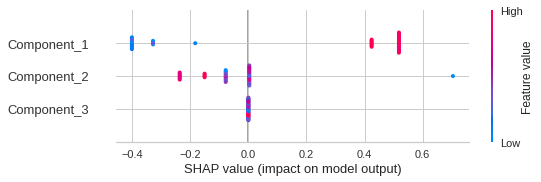

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [85]:
interpret_model(tuned_dt_pca, plot='summary')

In [87]:
#explainer = shap.TreeExplainer(tuned_dt_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [88]:
interpret_model(tuned_dt_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


**Visualize many predictions**

In [89]:
interpret_model(tuned_dt_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
